<a href="https://colab.research.google.com/github/prakashaditya369/NMA_Kay_Gallant_Project/blob/main/NMA_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
!nvidia-smi 
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh --quiet

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.6/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.6/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())
```

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [ ]:
fname = "kay_labels.npy"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/r638s/download
fname = "kay_images.npz"
if not os.path.exists(fname):
  !wget -qO $fname https://osf.io/ymnjv/download
with np.load(fname) as dobj:
    dat = dict(**dobj)
labels = np.load('kay_labels.npy')

In [ ]:
print(labels[0,:].shape)

(1750,)


## Useful For label representation in form of numbers.

In [ ]:
label_index_l = []
for i in range(4):
  label_index = {}
  check = labels[i,:]
  uniques = np.unique(check)
  uniques = list(uniques)
  j = 0
  for labl in uniques:
    label_index[labl] = j
    j+=1
  label_index_l.append(label_index)

In [ ]:
responses= dat['responses']

In [ ]:
print(dat['roi'].shape)

(8428,)


In [ ]:
data = np.load("/content/drive/My Drive/Team KayGallant/Data/vgg16_stimuli_features.npy")

In [ ]:
print(data.shape)
print(responses.shape)

(1750, 4096)
(1750, 8428)


In [ ]:
#Time  for studying with ROI
select_roi = 1
responses_roi = dat['responses'][:,np.where(dat['roi'] == select_roi)[0]]
print(responses_roi.shape)

(1750, 1294)


## Here goes Dimension Reductionality

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_PCA = pca.fit_transform(data)
y_PCA = pca.fit_transform(responses)

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
X_TSNE = tsne.fit_transform(data)
# y_TSNE = tsne.fit_transform(responses_roi)

In [ ]:
index = 0    #Change the index to one you want to use. Like if you want to use 1st labels,index =0 ... 
num_labels = np.array([label_index_l[index][i] for i in list(labels[index,:])])

In [ ]:
print(num_labels.shape)
print(len(np.unique(num_labels)))

(1750,)
8


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation as LDA
lda = LDA(n_components = 2)
X_LDA = lda.fit_transform(data)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA_
lda_ = LDA_(n_components =2)
X_LDA_ = lda_.fit_transform(data,num_labels)

In [ ]:
print(type(X_LDA_))

<class 'numpy.ndarray'>


Features LDA


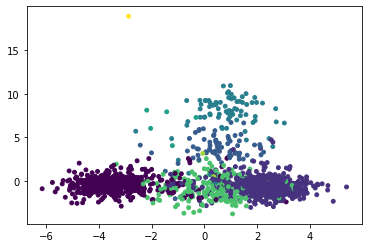

In [ ]:
print("Features LDA")
# pprint.pprint(label_index_l[index])
# X_TSNE_norm = X_TSNE/np.sum(np.abs(X_TSNE),axis = 0)
plt.scatter(X_LDA_[:,0], X_LDA_[:,1], c = num_labels,label = num_labels,s = 15)
# plt.legend()
# plt.grid()

Feature PCA


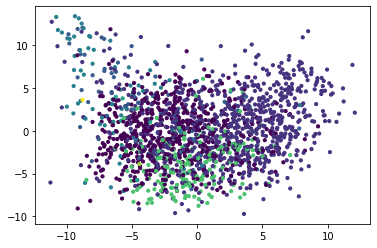

In [ ]:
print("Feature PCA")
plt.scatter(X_PCA[:,0], X_PCA[:,1], c = num_labels,s = 10)

Responses PCA


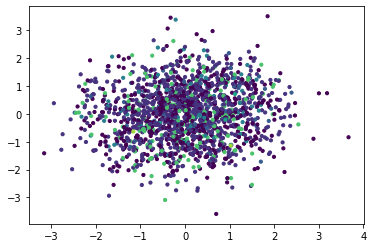

In [ ]:
print("Responses PCA")
plt.scatter(responses[:,5], responses[:,6], c = num_labels,s = 10)

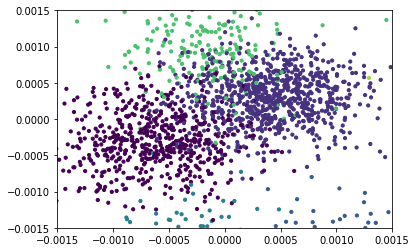

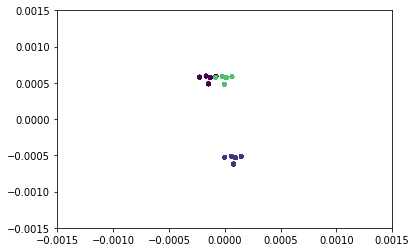

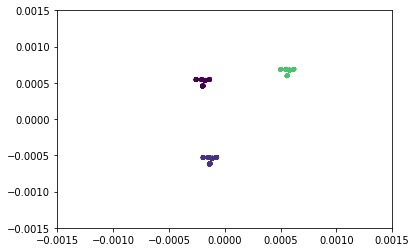

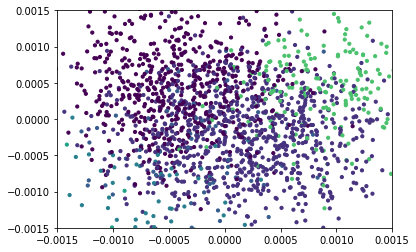

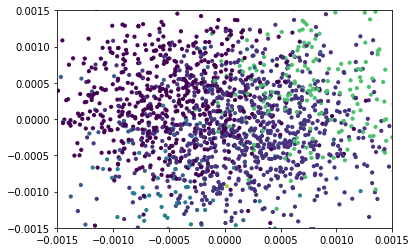

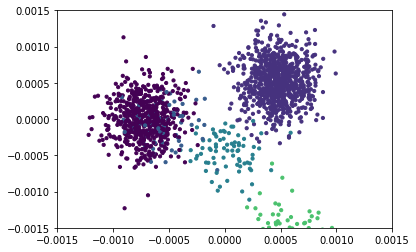

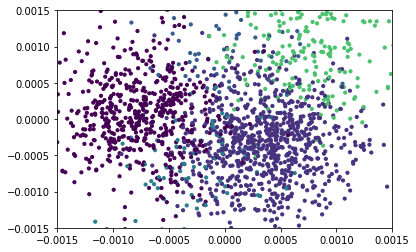

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2)
for i in range(1,8):
  #Time  for studying with ROI
  select_roi = i
  responses_roi = dat['responses'][:,np.where(dat['roi'] == select_roi)[0]]
  # print(data_roi.shape)
  # X_TSNE = tsne.fit_transform(data)
  y_TSNE = lda_.fit_transform(responses_roi,num_labels)
  # print("Responses TSNE")
  y_TSNE_norm = y_TSNE/np.sum(np.abs(y_TSNE),axis = 0)
  plt.scatter(y_TSNE_norm[:,0], y_TSNE_norm[:,1],c=num_labels,s = 10)
  plt.show()

#cuML Part

In [ ]:
import time
t0= time.clock()
from sklearn.datasets import load_digits
X, y = load_digits().data, load_digits().target
from cuml.manifold import TSNE
tsne = TSNE(n_components = 2)
X_hat = tsne.fit_transform(X)
t1 = time.clock() - t0
print("Time elapsed: ", t1)
# To plot the embedding
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_hat[:,0], X_hat[:,1], c = y, s = 0.5)

Time elapsed:  1.0859680000000012


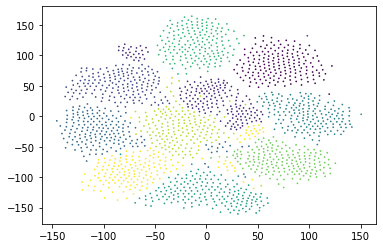

In [ ]:
import time
t0= time.clock()
from sklearn.datasets import load_digits
X, y = load_digits().data, load_digits().target
from cuml.manifold import TSNE
tsne = TSNE(n_components = 2,method = 'barnes_hut')
X_hat = tsne.fit_transform(X)
t1 = time.clock() - t0
print("Time elapsed: ", t1)
# To plot the embedding
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X_hat[:,0], X_hat[:,1], c = y, s = 0.5)

#CNN Part

In [ ]:
import skimage.transform
import torchvision.transforms as transforms
from skimage.color import gray2rgb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')
# from tensorflow.keras.applications.resnet50 import ResNet50
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

102973440/102967424 [==============================] - 3s 0us/step


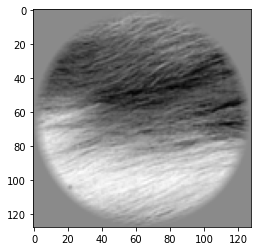

In [ ]:
stimuli = dat['stimuli']
plt.imshow(stimuli[4],cmap ='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


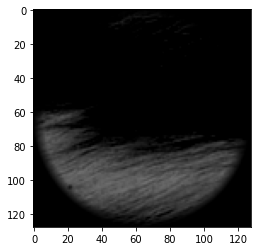

In [ ]:
plt.imshow(gray2rgb(stimuli[4]),cmap = 'brg')
stimuli = skimage.transform.resize(stimuli,(224,224,3))
for image_ in stimuli:
  image = gray2rgb(image)

In [ ]:

model = VGG16(weights='imagenet', include_top=False)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
x = skimage.transform.resize(gray2rgb(stimuli[0]),(224,224,3))
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n06359193', 'web_site', 0.060191356), ('n03729826', 'matchstick', 0.050471574), ('n01930112', 'nematode', 0.047283318)]
